# Sales Analysis

### Library Imports

Import all necessary libraries for files import & export, visualization and analysis.

In [1]:
# Import necessary Libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

# For counting 'unique pairs' of numbers into a python dictionary
from itertools import combinations
from collections import Counter



## Data Reading


In [2]:
# Merging 12 months of sales data into a single file
files = [file for file in os.listdir('/Users/tarahanni/Documents/Data/Sales Analysis/Sales Data')]

all_months = pd.DataFrame()

for file in files:
    df = pd.read_csv('/Users/tarahanni/Documents/Data/Sales Analysis/Sales Data/'+file )
    all_months = pd.concat([all_months, df])

all_months.to_csv('all_data.csv', index=False)

In [3]:
# Read data 'all_data.csv' in DataFrame
all_data = pd.read_csv('all_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Unnamed: 0
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",NaN
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",NaN
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",NaN
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",NaN
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",NaN


## Data Cleaning

In [4]:
# Show Dataframe info
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186852 entries, 0 to 186851
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          186305 non-null  object 
 1   Product           186305 non-null  object 
 2   Quantity Ordered  186305 non-null  object 
 3   Price Each        186305 non-null  object 
 4   Order Date        186305 non-null  object 
 5   Purchase Address  186305 non-null  object 
 6   Unnamed: 0        0 non-null       float64
dtypes: float64(1), object(6)
memory usage: 10.0+ MB


In [5]:
# Remove `Unnamed` column
all_data = all_data.drop('Unnamed: 0',axis=1)

In [6]:
# Display number of rows and column
all_data.shape

(186852, 6)

In [7]:
# Rename columns as needed
all_data = all_data.rename(columns={'Order ID': 'order_id',
                                    'Product': 'product',
                                    'Quantity Ordered': 'quantity',
                                    'Price Each': 'price',
                                    'Order Date': 'date',
                                    'Purchase Address': 'address'})

In [8]:
# Check if there are empty rows
all_data.isna().sum()

order_id    547
product     547
quantity    547
price       547
date        547
address     547
dtype: int64

In [9]:
# Remove all missing data
all_data = all_data.dropna(how='all')
all_data.head(10)

In [12]:
# Check for duplicates
all_data.duplicated().sum()

618

In [14]:
# Remove duplicate rows
all_data = all_data.drop_duplicates()

In [38]:
# Display the current number of rows
all_data.shape

(185652, 10)

## Data Manipulation

An error occurred while attempting to convert the data type of the column `date`. The resulting output displays the following message: *Unknown string format: Order Date*. Therefore, it is necessary to identify and eliminate the index containing the phrase *Order Date*.

In [17]:
# Verify if in 'date' column containing String
data_error = all_data[all_data['date'] == 'Order Date']
data_error.head()

,order_id,product,quantity,price,date,address
254,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [18]:
# Drop the index of the 254th row
all_data = all_data.drop(index=254)

In [19]:
# Convert data type 'date' column into datetime
all_data['date'] = pd.to_datetime(all_data['date'])
all_data.head()

,order_id,product,quantity,price,date,address
0,295665,Macbook Pro Laptop,1,1700,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301"


In [20]:
# Change the data type for column 'quantity' and 'price'
all_data['quantity'] = all_data['quantity'].astype(int)
all_data['price'] = all_data['price'].astype(float)

In [21]:
# Display Data types
all_data.dtypes

order_id            object
product             object
quantity             int64
price              float64
date        datetime64[ns]
address             object
dtype: object

To make it usable for further analysis, the data in the `address` column needs to be separated into cities, including *state* information. Furthermore, the `date` column should be parsed to extract the *month* and *hour* components. In addition, introduce a new column called `total_sales`, which is calculated by multiplying the corresponding values in the `quantity` and `price` columns.

In [22]:
# add new column 'city' include state
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

all_data['city'] = all_data['address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")

#add new column 'month' and 'hour'
all_data['month'] = all_data['date'].dt.month
all_data['hour'] = all_data['date'].dt.hour

# add new column 'total_sales'
all_data['total_sales'] = all_data['quantity'] * all_data['price']

#display the results
all_data.head()

,order_id,product,quantity,price,date,address,city,month,hour,total_sales
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",New York City (NY),12,0,1700.00
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",New York City (NY),12,7,600.00
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",New York City (NY),12,18,11.95
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",San Francisco (CA),12,15,149.99
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",Atlanta (GA),12,12,11.95


In [23]:
all_data.describe()

,quantity,price,month,hour,total_sales
count,185686.000000,185686.000000,185686.000000,185686.000000,185686.000000
mean,1.124544,184.519255,7.058653,14.412934,185.611936
std,0.443069,332.843838,3.502932,5.423329,333.032118
min,1.000000,2.990000,1.000000,0.000000,2.990000
25%,1.000000,11.950000,4.000000,11.000000,11.950000
50%,1.000000,14.950000,7.000000,15.000000,14.950000
75%,1.000000,150.000000,10.000000,19.000000,150.000000
max,9.000000,1700.000000,12.000000,23.000000,3400.000000


In [24]:
# Check if there is a year other than 2019
not_in_2019 = all_data[all_data['date'].dt.year != 2019]
not_in_2019.head()

,order_id,product,quantity,price,date,address,city,month,hour,total_sales
1563,297150,Lightning Charging Cable,1,14.95,2020-01-01 00:38:00,"427 Wilson St, Dallas, TX 75001",Dallas (TX),1,0,14.95
2265,297817,iPhone,1,700.00,2020-01-01 00:22:00,"519 13th St, New York City, NY 10001",New York City (NY),1,0,700.00
2266,297817,Lightning Charging Cable,2,14.95,2020-01-01 00:22:00,"519 13th St, New York City, NY 10001",New York City (NY),1,0,29.90
2425,297969,Google Phone,1,600.00,2020-01-01 00:54:00,"542 2nd St, San Francisco, CA 94016",San Francisco (CA),1,0,600.00
2806,298344,Wired Headphones,4,11.99,2020-01-01 03:34:00,"731 7th St, New York City, NY 10001",New York City (NY),1,3,47.96


First of all, check which dates and months contain years other than 2019.

In [39]:
not_in_2019['date'].map(lambda x: x.date()).unique()

array([datetime.date(2020, 1, 1)], dtype=object)

In [25]:
len(not_in_2019)

34

As it happens, there are only 34 rows that display the date 1/1/2020. Given the limited dataset for 2020, it is best to exclude this data for a more meaningful analysis.

In [27]:
# only displays data for 2019
all_data = all_data.loc[all_data['date'].dt.year == 2019]

## Analysis

In [28]:
# Revenue in year 2019

revenue = all_data['total_sales'].sum()
print("Revenue in year 2019 is: " + str(revenue))

Revenue in year 2019 is: 34456867.65


In [29]:
# monthly sales in 2019
monthly_sales= all_data.groupby('month').sum()['total_sales'].reset_index()
pd.set_option('display.float_format', '{:.2f}'.format)
monthly_sales

,month,total_sales
0,1,1812742.87
1,2,2200078.08
2,3,2804973.35
3,4,3389217.98
4,5,3150616.23
5,6,2576280.15
6,7,2646461.32
7,8,2241083.37
8,9,2094465.69
9,10,3734777.86


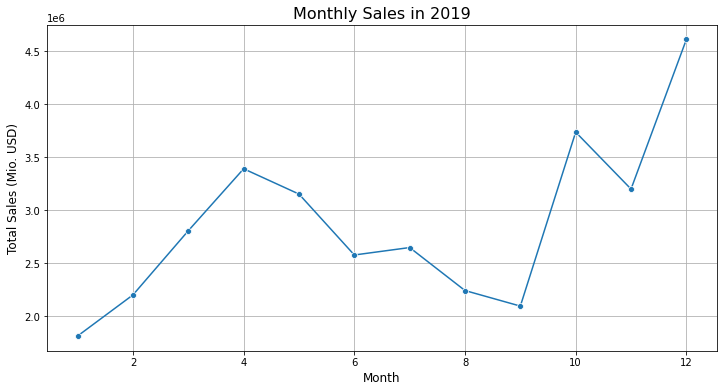

In [30]:
# Create the line plot to get a better view
fig = plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_sales, x= 'month', y='total_sales', marker='o')
plt.title('Monthly Sales in 2019', fontsize= 16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales (Mio. USD)', fontsize=12)
plt.grid()
plt.show()


From line graph above we can conclude that the least revenue is in January and the most revenue is in December. 

In [31]:
# Sales by city
city_sales= all_data.groupby('city').sum()['total_sales'].reset_index()
# Sort from the highest to the lowest
city_sales = city_sales.sort_values(by='total_sales', ascending=False)
city_sales

,city,total_sales
8,San Francisco (CA),8252258.67
4,Los Angeles (CA),5447304.29
5,New York City (NY),4660526.52
2,Boston (MA),3657300.76
0,Atlanta (GA),2794199.07
3,Dallas (TX),2763659.01
9,Seattle (WA),2744896.03
7,Portland (OR),1869857.57
1,Austin (TX),1817544.35
6,Portland (ME),449321.38


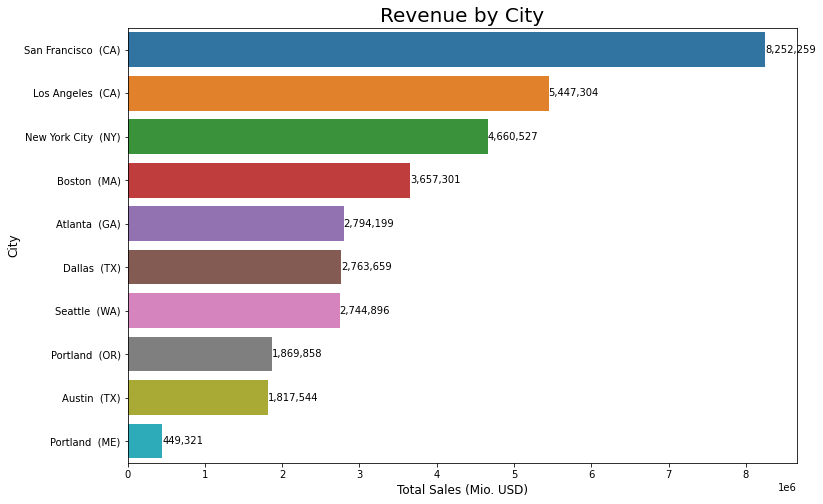

In [32]:
# Create a barplot
fig = plt.figure(figsize=(12,8))
ax= sns.barplot(data=city_sales, y= 'city', x='total_sales')
ax.bar_label(ax.containers[0], fmt='{:,.0f}')
plt.title('Revenue by City', fontsize= 20)
plt.xlabel('Total Sales (Mio. USD)', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.show()

Looking at the bar chart presented above, it is clear that the city of San Francisco(CA) contributed the highest revenue, which amounted to $8,252,259.

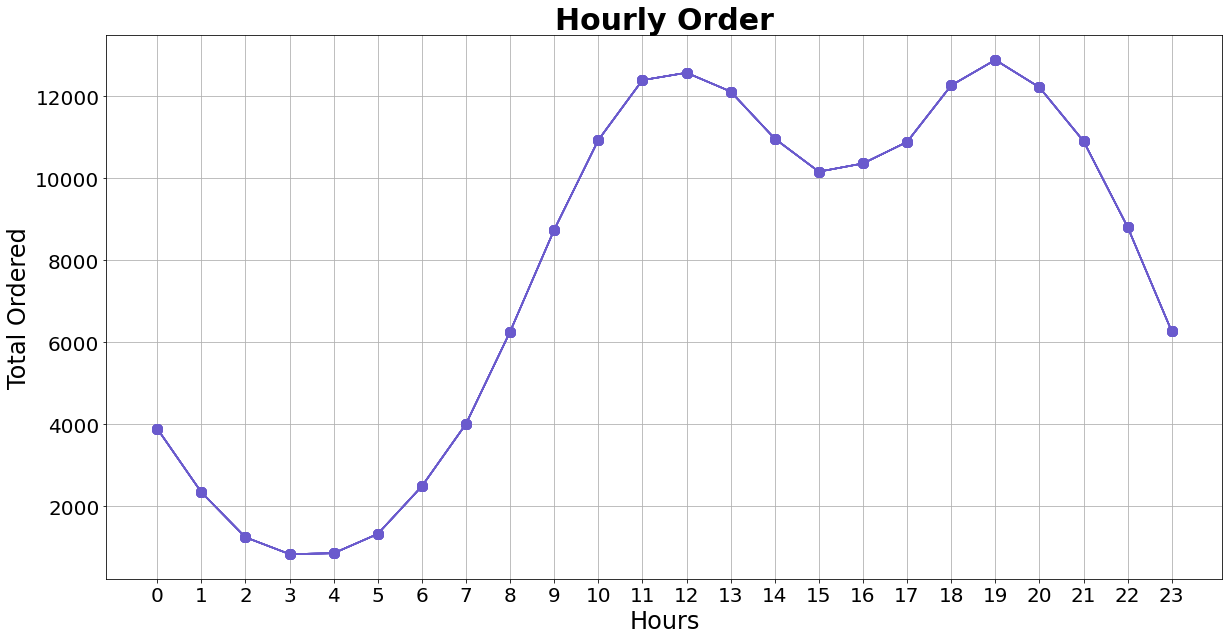

In [33]:
# Create line plot to display total orders by hour
hours = [hour for hour, df in all_data.groupby('hour')]

fig = plt.figure(figsize=(20,10))
ax = plt.plot(hours, all_data.groupby(['hour']).count(), marker = 'o', markersize= 10, color='slateblue')
plt.xticks(hours)
plt.tick_params(axis='both', labelsize=20)
plt.title('Total Orders by Hour', fontsize= 30, weight='bold')
plt.xlabel('Hours', fontsize=24)
plt.ylabel('Total Ordered', fontsize=24)
plt.grid()
plt.show()


Based on the line graph illustrated above, the peak hours for placing orders are 7pm, 12pm, and 11am

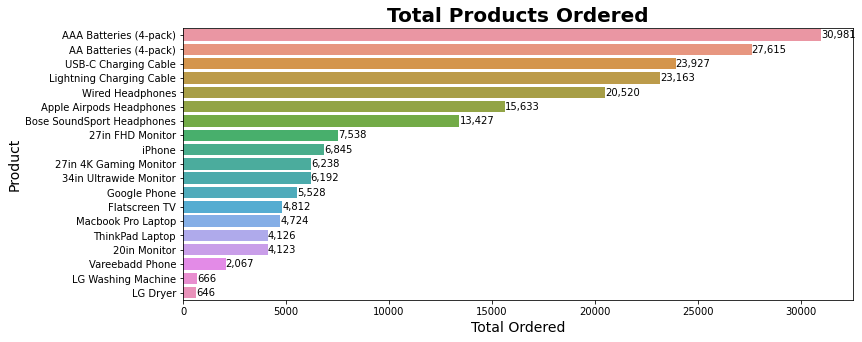

In [34]:
# Create barplot to display total products
qty_products = all_data.groupby(all_data['product'])['quantity'].sum().sort_values(ascending=False)

fig = plt.figure(figsize=(12,5))
ax = sns.barplot(qty_products, x= qty_products,y=qty_products.index)
ax.bar_label(ax.containers[0], fmt='{:,.0f}')
plt.title('Total Products Ordered', fontsize= 20, weight='bold')
plt.xlabel('Total Ordered', fontsize=14)
plt.ylabel('Product', fontsize=14)
plt.show()

According to the information presented in the bar chart, the product with the highest number of orders is *AAA Batteries (4-Pack)*, whereas the item with the lowest order count is the *LG Dryer*.

next, we will create a bar chart to display revenue by product and a line chart to display each product price.

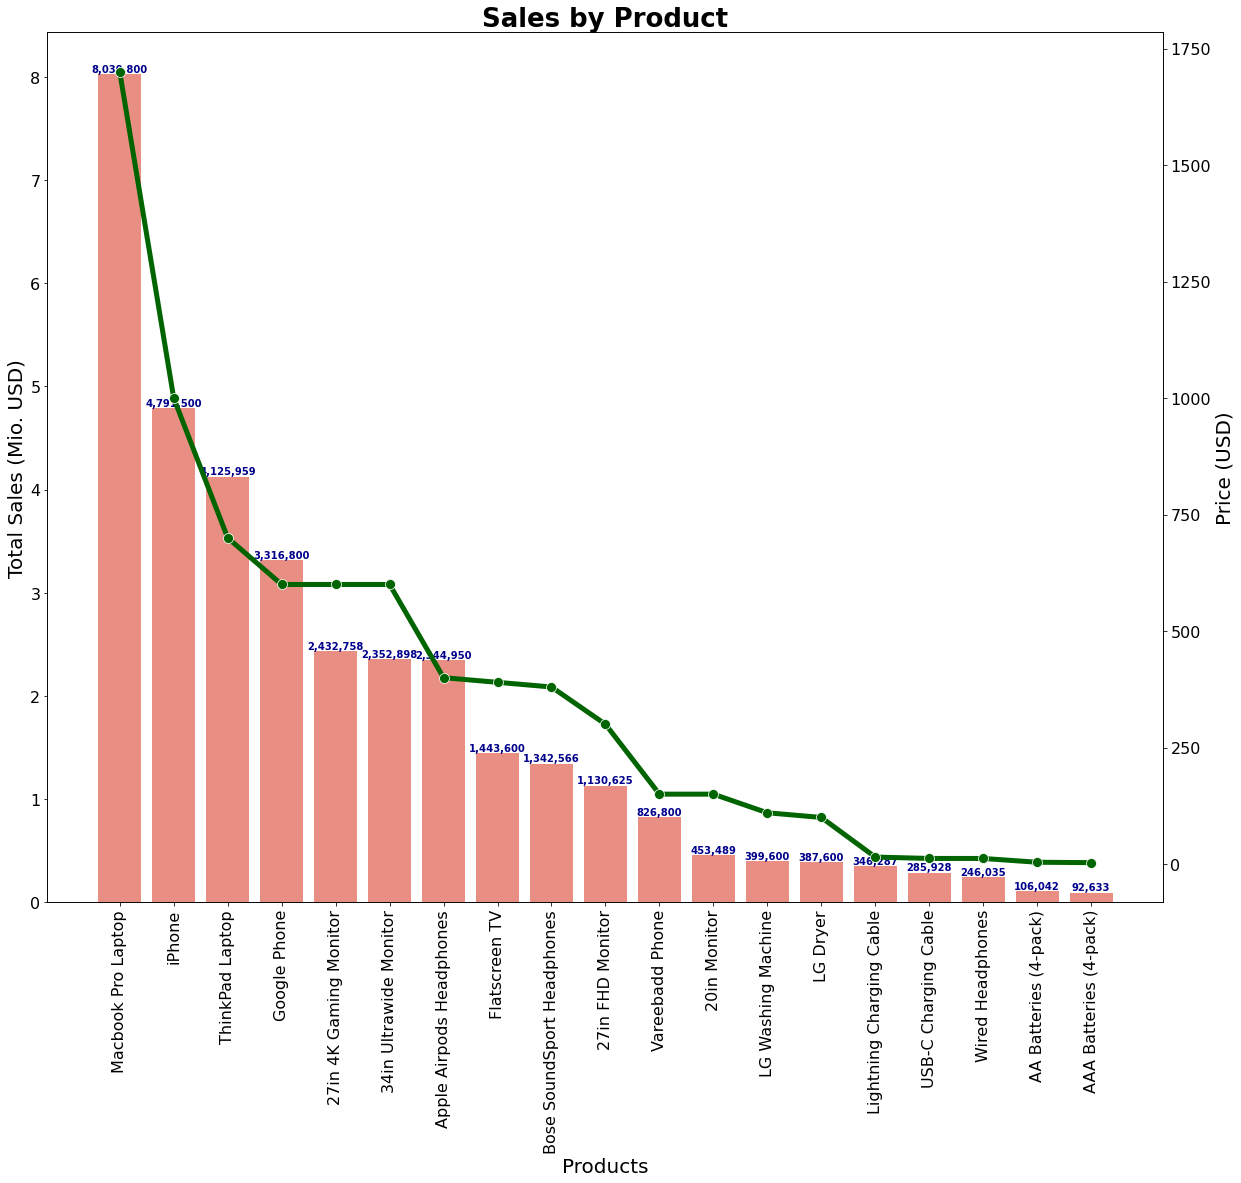

In [43]:
# Create barplot and line plot
product_sales= all_data.groupby('product').sum()['total_sales'].reset_index()
product_sales = product_sales.sort_values(by='total_sales', ascending=False)

prices = all_data.groupby('product').mean()['price'].sort_values( ascending=False)

fig = plt.figure(figsize=(20,16))

ax1= sns.barplot(data=product_sales, x= 'product', y='total_sales', color='salmon')
ax2 = ax1.twinx()
sns.lineplot(data=prices, ax=ax2, color='darkgreen', marker='o', markersize= 10, linewidth=5)

# these lines add the annotations for the plot.
plt.title('Sales by Product', fontsize=26, weight='bold')
ax1.bar_label(ax1.containers[0], fmt='{:,.0f}',weight='bold', color='darkblue')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation='vertical', size=16)
ax1.set_yticklabels(ax1.get_yticklabels(), size=16)
ax2.set_yticklabels(ax2.get_yticklabels(), size=16)
ax1.set_xlabel('Products', fontsize=20)
ax1.set_ylabel('Total Sales (Mio. USD)', fontsize=20)
ax2.set_ylabel('Price (USD)', fontsize=20)
plt.show()

With about $8 million in revenue, the *Macbook Pro Laptop* emerged as the highest revenue product. Surprisingly, the previous bar chart shows a modest number of orders of only 4,724 for this product. This noticeable difference is due to the premium price of this product, which significantly contributes to its huge revenue.

Next, we will find out which products are commonly ordered together.

In [44]:
# Select rows if id appear several time
df1 = all_data[all_data['order_id'].duplicated(keep=False)]

# Concatenate strings from several rows
df1['grouped'] = df1.groupby('order_id')['product'].transform(lambda x: ','.join(x))
df2 = df1[['order_id', 'grouped']].drop_duplicates()

In [47]:
# Counting unique pairs of numbers
count = Counter()

for row in df2['grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(5):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1001
('Google Phone', 'USB-C Charging Cable') 985
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 413
('Vareebadd Phone', 'USB-C Charging Cable') 361


Most of the items that are often purchased together are mobile phones and chargers or mobile phones and headphones.

## Conclusion

In year 2019 the company generated revenue with total $34,456,867.65 and the highest selling month were December, October and April. The company made its highest sales in state california, located in the cities San Fransisco and Los Angeles. 

To optimize the impact of a company's advertising campaign, it is advisable to consider promotions during the months of December, October, and April, as these months record the highest order volumes. In addition, the most effective times tend to fall within the 11am to 12pm and 6pm to 7pm timeframes, coinciding with the company's peak sales activity periods.

The primary factor driving the high demand for the *AAA Battery (4-pack)* product is its affordability, in contrast to higher-priced items such as the *Macbook Pro Laptop*, which had a sales count of only 4,724. Nonetheless, this product managed to generate the highest revenue due to its high price.

Analyzing the top 5 frequently co-purchased items, it is clear that products such as mobile phones and chargers are commonly bought together. Following closely, mobile phones and wired headphones take the second position. This pattern suggests that when purchasing a mobile phone, buyers tend to simultaneously order related accessories.
